In [1]:
PDvsHC = "https://raw.githubusercontent.com/Muhammad-Taufiq-Khan/Perkinsons-Disease/main/Research%20Project%20(February%202022%20-%20September%202022)/Project%20Codes%20%26%20Data/Early%20Biomarkers%20of%20Parkinson's%20Disease/ModifiedSpeechPDvsHC.csv"

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(PDvsHC);df.head()

,Class,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (ÃÂÃÂ¢ÃÂÃÂÃÂÃÂ°/min),Relative loudness of respiration (dB),...,Acceleration of speech timing (-/min2).1,Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives (ÃÂÃÂ¢ÃÂÃÂÃÂÃÂ°/min).1,Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (-/min).1,Latency of respiratory exchange (ms).1
0,1,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,1,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,1,1.550,211,11.97,377,322,47.54,38.12,2.657,-16.89,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,1,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,1,1.543,269,6.72,211,328,42.90,47.12,-0.973,-22.61,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [4]:
x = df.drop('Class',axis=1)
y = df.Class

In [5]:
x = x.astype('float32')

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=0.8,random_state=0)

In [7]:
print(xtest.shape)

(16, 24)


In [8]:
def Standard(xtrain,xtest):
    from sklearn.preprocessing import StandardScaler
    stdS = StandardScaler()
    xtrain = stdS.fit_transform(xtrain)
    xtest = stdS.transform(xtest)
    # print(f"Original Test set data ------> {}, Class")
    return xtrain, xtest

In [9]:
def LOF(xtrain, ytrain):
    from sklearn.neighbors import LocalOutlierFactor
    lof = LocalOutlierFactor(n_neighbors=15, novelty=False)
    # print(f"Original data are----> Features:{xtrain.shape}, Label:{ytrain.shape}")
    yhat = lof.fit_predict(xtrain)
    mask = yhat != -1
    xtrain, ytrain = xtrain[mask, :], ytrain[mask]
    # print(f"Outlierless data are----> Features:{xtrain.shape}, Label:{ytrain.shape}")
    return xtrain, ytrain

In [10]:
def OverSample (xtrain, ytrain):
    from imblearn.over_sampling import SMOTE
    oversample = SMOTE()
    xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)
    # print(f"Shape after oversampling: {xtrain.shape, ytrain.shape}")
    return xtrain, ytrain

In [11]:
xtrain,xtest = Standard(xtrain,xtest)
xtrain,ytrain=LOF(xtrain,ytrain)
xtrain,ytrain = OverSample(xtrain,ytrain)

In [12]:
# X_train, y_train = np.array(xtrain), np.array(ytrain)

In [13]:
X_train = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [14]:
X_train.shape
xtest.shape

(16, 24, 1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout

In [16]:
model = Sequential()
model.add(Input(shape=(24,1)))
model.add(Dense(80,activation='tanh'))
model.add(Dense(60,activation='tanh'))
model.add(Dense(40,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
from tensorflow.keras import optimizers

In [18]:
model.compile(optimizer=optimizers.Adam(0.01), loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(X_train,ytrain,epochs=100,batch_size=1)

Epoch 1/100
72/72 [==============================] - 0s 972us/step - loss: 0.7265 - accuracy: 0.5561
Epoch 2/100
72/72 [==============================] - 0s 777us/step - loss: 0.7112 - accuracy: 0.4525
Epoch 3/100
72/72 [==============================] - 0s 667us/step - loss: 0.6949 - accuracy: 0.3872
Epoch 4/100
72/72 [==============================] - 0s 556us/step - loss: 0.6941 - accuracy: 0.5000
Epoch 5/100
72/72 [==============================] - 0s 653us/step - loss: 0.6943 - accuracy: 0.4306
Epoch 6/100
72/72 [==============================] - 0s 556us/step - loss: 0.6948 - accuracy: 0.3056
Epoch 7/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4306
Epoch 8/100
72/72 [==============================] - 0s 667us/step - loss: 0.6942 - accuracy: 0.4861
Epoch 9/100
72/72 [==============================] - 0s 639us/step - loss: 0.6946 - accuracy: 0.5000
Epoch 10/100
72/72 [==============================] - 0s 639us/step - loss: 0.6964 - accuracy

In [20]:
score = model.evaluate(xtest,ytest,verbose=0)
print('loss',score[0])
print('accuracy',score[1])

loss 0.6874743103981018
accuracy 0.875


In [21]:
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve

In [22]:
Y_pred = np.argmax(model.predict(xtest),axis=1)

In [23]:
print(classification_report(ytest,Y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.00      0.00      0.00         2

    accuracy                           0.88        16
   macro avg       0.44      0.50      0.47        16
weighted avg       0.77      0.88      0.82        16



In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

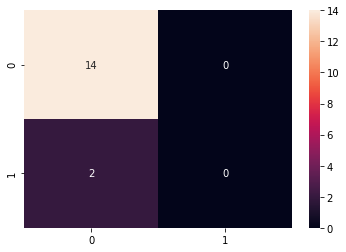

In [25]:
sns.heatmap(confusion_matrix(ytest,Y_pred),annot=True)

In [52]:
fpr, tpr, thresholds = roc_curve(ytest, Y_pred)

In [55]:
import sklearn.metrics as metrics
roc_auc = metrics.auc(fpr, tpr)

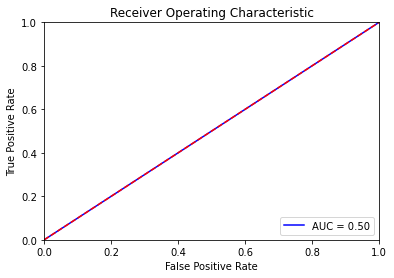

In [56]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()